<h1><b>인공지능개론 2주차 과제</b></h1>
<p>컴퓨터공학과 202136038 조성준</p>


---

<h2><b>1. 데이터 로딩</b></h2>

In [154]:
import pandas as pd
# url을 통해 CSV 파일 읽기
url = "https://raw.githubusercontent.com/MyungKyuYi/AI-class/main/titanic.csv" #titanic.csv의 url입력
df = pd.read_csv(url)

# 데이터프레임 확인
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [155]:
# 컬렴명 확인
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<h2><b>2. 결측치 확인</b></h2>

In [156]:
# 결측치 확인
print(df.isnull().sum())
# 확인 결과: Age와 Cabin 그리고 Embarked에서 결측치가 발견되었음

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


<h2><b>3. 결측치 처리(Age, Cabin, Embarked에 대하여)</b></h2>

<h3><b><li>Age 결측치 처리</li><b></h3>
결측치를 제외한 값으로 계산햐야하므로 Age컬럼의 결측치는 Age의 평균값으로 대체


In [157]:
# 나이의 평균값 구하기
mean_age = df['Age'].mean()
print("평균 나이:", mean_age)

print("######################")

# age 컬럼의 결측치를 평균값으로 채우기
df['Age'] = df['Age'].fillna(mean_age)

# 반영된 결과출력
print(df.isnull().sum())

평균 나이: 29.69911764705882
######################
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


<h3><b><li>Cabin 결측치 처리</li><b></h3>
Cabin의 결측치는 너무 많고 필수적이지 않으므로 제거

In [158]:
# Cabin 컬럼을 삭제
df = df.drop(columns=["Cabin"])

# 반영된 결과출력
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64


<h3><b><li>Embarked 결측치 처리</li><b></h3>
탑승항구를 의미하는 Embarked의 결측치는 C, Q, S로 구분됨.<br>
보통 탑승자들이 제일 많이 타는 곳에서 탑승했을 확률이 높으므로 Embarked의 결측치 두개는 Embarked 컬럼의 최빈값으로 대체.

In [159]:
# Embarked 컬럼의 최빈값 계산
most_frequent_embarked = df["Embarked"].mode()[0]

# Embarked 컬럼의 결측치를 최빈값으로 채우기
df['Embarked'] = df['Embarked'].fillna(most_frequent_embarked)

# 반영된 결과출력
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64




---

이상 모든 결측치를 대체하였음.

<h2><b>4. 레이블 확인(imbalanced data)</b></h2>
<li>타겟 변수(Survived)의 분포를 확인하고, 각 클래스(생존/사망)의 비율을 시각화</li>

,count
Survived,
0,549
1,342


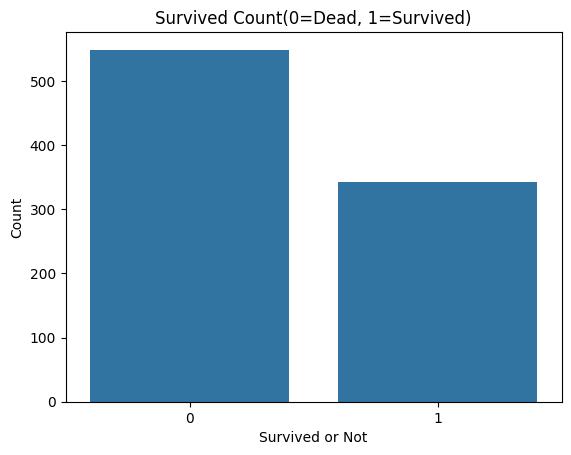

In [160]:
import seaborn as sns
import matplotlib.pyplot as plt
# 레이블 갯수 확인 (그래프)
sns.countplot(data=df, x="Survived")
plt.xlabel("Survived or Not")
plt.ylabel("Count")
plt.title("Survived Count(0=Dead, 1=Survived)")
# 레이블 갯수 확인 (숫자)
df['Survived'].value_counts()

<h2><b>5. 불필요한 컬럼 제거</b></h2>
생존율 계산에 필수적이지 않다고 판단되는 컬럼을 제거해야함.
<br>

<h3>생존율 예측에 중요한 칼럼</h3>
<li>Sex: 생존 여부와 강한 관계가 있는 중요한 특성
<li>Age: 승객의 나이는 생존율에 영향을 미칠 수 있는 중요한 변수
<li>Pclass: 탑승 클래스(Pclass)는 생존율에 중요한 영향
<li>SibSp (동반한 형제/배우자 수) 및 Parch (동반한 부모/자녀 수): 가족과 함께 탑승한 승객의 생존율에 영향을 미칠 수 있음.
<li>Fare: 운임 가격은 승객의 경제적 배경을 반영하며, 생존 여부와 관계가 있을 수 있음.
<br><br>
<h3>생존율 예측에 불필요한 칼럼</h3>
<li>PassengerId: 각 승객을 구별하는 고유 식별자에 불과하며, 생존 여부와는 직접적인 관계가 없음.
<li>Name: 승객의 이름 역시 생존 여부와는 직접적인 관계가 없음.
<li>Ticket: 티켓 번호는 역시 생존 여부와는 직접적인 관계가 없음.
<li>Cabin: 결측치가 많고, 불완전한 정보일 가능성이 높음. 결측치가 많다면 생존률 예측에 문제가 될 수 있음.
<li>Embarked: 탑승한 항구도 생존율에 직접적인 관계가 없음.

In [161]:
# 불필요한 칼럼 삭제(이미 위에서 Cabin 결측치는 삭제되었기 때문에 나머지 컬럼만 삭제)
df.drop(columns=["PassengerId", "Name", "Ticket", 'Embarked'], inplace=True)
# 변경된 데이터프레임 확인
print(df.head())

   Survived  Pclass     Sex   Age  SibSp  Parch     Fare
0         0       3    male  22.0      1      0   7.2500
1         1       1  female  38.0      1      0  71.2833
2         1       3  female  26.0      0      0   7.9250
3         1       1  female  35.0      1      0  53.1000
4         0       3    male  35.0      0      0   8.0500


<h2><b>6. 라벨 인코딩(숫자로 변환)</b></h2>

In [162]:
from sklearn.preprocessing import LabelEncoder

# df.['label'].value counts()를 변환 전
print("변환 전 데이터:")
print(df['Sex'].value_counts())

# LabelEncoder 초기화
label_encoder = LabelEncoder()

# 특정 컬럼만 인코딩
columns_to_encode = ['Sex']  # 인코딩할 컬럼 리스트
for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])

# df.['label'].value counts()를 변환 후
print("\n변환 후 데이터:")
print(df['Sex'].value_counts())

변환 전 데이터:
Sex
male      577
female    314
Name: count, dtype: int64

변환 후 데이터:
Sex
1    577
0    314
Name: count, dtype: int64




---

Sex 컬럼에서 male=1, female=0으로 변환이 완료된 것을 확인할 수 있음.

<h2><b>7. 5가지 분류( RF, DT, LR, KNN, SVM )</b></h2>

In [163]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 데이터를 훈련 세트와 테스트 세트로 나누기 (80% 훈련, 20% 테스트)
X = df.drop("Survived", axis=1) # 생존여부를 나타내는 1열(axis=1)외의 모든 열을 삭제
y = df["Survived"] # 타겟변수
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# StandardScaler를 사용해 훈련 세트 변환
ss = StandardScaler() # StandardScaler 초기화
# 훈련 세트 변환
ss.fit(X_train)  # X_train을 사용해 스케일러를 학습
# 훈련 세트와 테스트 세트 변환
X_train_scaled = ss.transform(X_train)  # 훈련 데이터 스케일링
X_test_scaled = ss.transform(X_test)    # 테스트 데이터 스케일링


In [164]:
# 분류에 필요한 라이브러리 import
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

<h3><b>RF 분류<b></h3>

---


In [165]:
print ("\n--- Radom Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))


--- Radom Forest ---
0.7988826815642458
[[91 14]
 [22 52]]


<h3><b>DT 분류<b></h3>

---

In [166]:
print ("\n--- Decision Tree ---")
dt_clf = DecisionTreeClassifier(random_state=0)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))


--- Decision Tree ---
0.7653631284916201
[[85 20]
 [22 52]]


<h3><b>LR 분류<b></h3>

---

In [167]:
print ("\n--- Logistic Regression ---")
lr_clf = LogisticRegression(random_state=0)
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))


--- Logistic Regression ---
0.8100558659217877
[[92 13]
 [21 53]]


<h3><b>KNN 분류<b></h3>

---

In [168]:
print ("\n--- KNN ---")
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
pred = knn_clf.predict(X_test)
print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))


--- KNN ---
0.6927374301675978
[[84 21]
 [34 40]]


<h3><b>SVM 분류<b></h3>

---

In [169]:
print ("\n--- SVM ---")
svm_clf = SVC(random_state=0)
svm_clf.fit(X_train, y_train)
pred = svm_clf.predict(X_test)
print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))


--- SVM ---
0.6536312849162011
[[99  6]
 [56 18]]
